<h2>Customer Churn Analysis</h2>

Import necessary Library

In [150]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('Churn_Modelling.csv')

In [152]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [154]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Defining input var & target var

In [156]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

### Encoding categorical var

Label encoding the age column

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2]= le.fit_transform(x[:,2])

One hot encoding the 'geography' column

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

Splitting data into train and test set

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [161]:
x_train.shape

(8000, 12)

In [162]:
y_train.shape

(8000,)

Let's apply all the classification algorithm.
- Logistic Regression
- Naive Bayes
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- k-Nearest Neighbors (k-NN)
- Neural Network
- Ensamble Leaning Voting Classifier

Model: LogisticRegression
Accuracy: 78.9000
Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      1933
           1       0.06      0.37      0.11        67

    accuracy                           0.79      2000
   macro avg       0.52      0.59      0.49      2000
weighted avg       0.94      0.79      0.85      2000

LogisticRegression's bias is  0.789875
LogisticRegression's variance is  0.789


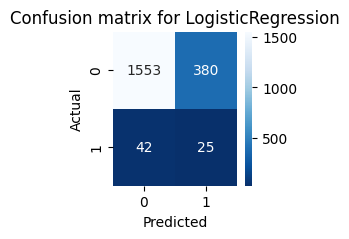

Model: DecisionTreeClassifier
Accuracy: 80.2000
Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1551
           1       0.57      0.51      0.54       449

    accuracy                           0.80      2000
   macro avg       0.71      0.70      0.71      2000
weighted avg       0.80      0.80      0.80      2000

DecisionTreeClassifier's bias is  1.0
DecisionTreeClassifier's variance is  0.802


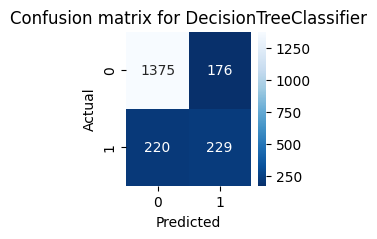

Model: RandomForestClassifier
Accuracy: 86.5000
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1729
           1       0.50      0.75      0.60       271

    accuracy                           0.86      2000
   macro avg       0.73      0.82      0.76      2000
weighted avg       0.90      0.86      0.88      2000

RandomForestClassifier's bias is  0.999875
RandomForestClassifier's variance is  0.865


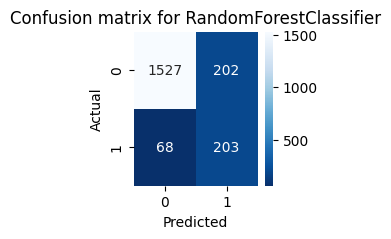

Model: SVC
Accuracy: 79.7500
Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.80      0.89      2000

SVC's bias is  0.796
SVC's variance is  0.7975


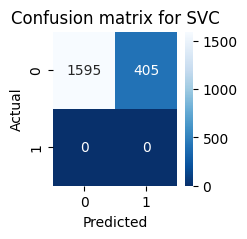

Model: KNeighborsClassifier
Accuracy: 76.4500
Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1842
           1       0.11      0.29      0.16       158

    accuracy                           0.76      2000
   macro avg       0.52      0.55      0.51      2000
weighted avg       0.87      0.76      0.81      2000

KNeighborsClassifier's bias is  0.816
KNeighborsClassifier's variance is  0.7645


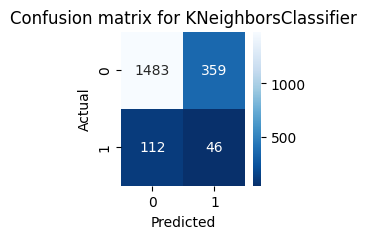

Model: GaussianNB
Accuracy: 78.4500
Model Parameters: {'priors': None, 'var_smoothing': 1e-09}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1904
           1       0.09      0.36      0.14        96

    accuracy                           0.78      2000
   macro avg       0.52      0.59      0.51      2000
weighted avg       0.92      0.78      0.84      2000

GaussianNB's bias is  0.785375
GaussianNB's variance is  0.7845


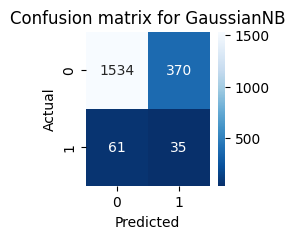

Model: MLPClassifier
Accuracy: 78.3000
Model Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      1953
           1       0.02      0.19      0.04        47

    accuracy                           0.78      2000
   macro avg       0.50      0.49      0.46      2000
weighted avg       0.95      0.78      0.86      2000

MLPClassifier's bias is  0.789625
MLPClassifier's variance is  0.783


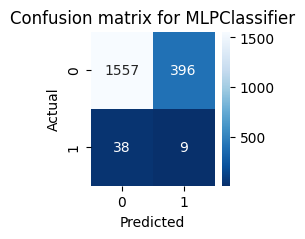

Model: VotingClassifier
Accuracy: 81.2000
Model Parameters: {'estimators': [('logreg', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('svm', SVC()), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('mlp', MLPClassifier())], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'hard', 'weights': None, 'logreg': LogisticRegression(), 'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'svm': SVC(), 'knn': KNeighborsClassifier(), 'nb': GaussianNB(), 'mlp': MLPClassifier(), 'logreg__C': 1.0, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__intercept_scaling': 1, 'logreg__l1_ratio': None, 'logreg__max_iter': 100, 'logreg__multi_class': 'auto', 'logreg__n_jobs': None, 'logreg__penalty': 'l2', 'logreg__random_state': None, 'logreg__solver': 'lbfgs', 'logreg__tol': 0.0001, 'logreg__verbose': 0, 'logreg__warm_start': False, 'dt__ccp_alpha': 0.0, 'dt__class_weight': None,

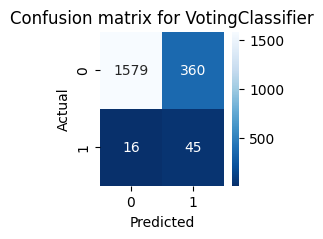

In [163]:
# Initialize classifiers
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
mlp_classifier = MLPClassifier()

# Create an ensemble of classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('nb', nb_classifier),
    ('mlp', mlp_classifier)
], voting='hard')

# Train and evaluate each classifier
classifiers = [logreg, dt_classifier, rf_classifier, svm_classifier, knn_classifier, nb_classifier, mlp_classifier, ensemble_classifier]
rank_table = []

for clf in classifiers:
  # Fit the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = clf.predict(x_test)

    # Evaluate the model
    clf_ac = accuracy_score(predictions,y_test) * 100
    clf_cm = confusion_matrix(predictions,y_test)
    clf_cr = classification_report(predictions,y_test)

    # Get model-specific information
    model_name = type(clf).__name__
    model_parameters = clf.get_params()

    # Print information
    print(f"Model: {model_name}")
    print(f"Accuracy: {clf_ac:.4f}")
    print(f"Model Parameters: {model_parameters}")
    print("Classification Report:\n", clf_cr)
    print(f"{model_name}'s bias is " ,clf.score(x_train,y_train))
    print(f"{model_name}'s variance is " ,clf.score(x_test,y_test))

    # Plotting the Confusion Matrix
    plt.figure(figsize=(2,2))
    sns.heatmap(clf_cm, annot=True, fmt='d', cmap='Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix for {model_name}')
    plt.show()

    rank_table.append([model_name,clf_ac,clf.score(x_train,y_train)*100,clf.score(x_test,y_test)*100])


In [164]:
print(rank_table)

[['LogisticRegression', 78.9, 78.9875, 78.9], ['DecisionTreeClassifier', 80.2, 100.0, 80.2], ['RandomForestClassifier', 86.5, 99.9875, 86.5], ['SVC', 79.75, 79.60000000000001, 79.75], ['KNeighborsClassifier', 76.44999999999999, 81.6, 76.44999999999999], ['GaussianNB', 78.45, 78.53750000000001, 78.45], ['MLPClassifier', 78.3, 78.9625, 78.3], ['VotingClassifier', 81.2, 85.0875, 81.2]]


In [165]:
rank_table = pd.DataFrame(rank_table,columns = ['Algorithm','Accuracy','Bias','Variance'])
rank_table

,Algorithm,Accuracy,Bias,Variance
0,LogisticRegression,78.90,78.9875,78.90
1,DecisionTreeClassifier,80.20,100.0000,80.20
2,RandomForestClassifier,86.50,99.9875,86.50
3,SVC,79.75,79.6000,79.75
4,KNeighborsClassifier,76.45,81.6000,76.45
5,GaussianNB,78.45,78.5375,78.45
6,MLPClassifier,78.30,78.9625,78.30
7,VotingClassifier,81.20,85.0875,81.20
